In [2]:
from bisip import mcmcinv

In [11]:
# Second test run
# This time we want to use a Debye decomposition approach
# We also want more control on the inversion

""" 1.
    Model to use ?"""
model = "PDecomp" # polynomial decomposition


""" 2.
    Paths to files ?"""
filepath = "/Users/Charles/Documents/SIP dat files/AVG_SIP-Reciprocals_K389160.dat"

""" 3.
    The data file has many headers and the phase units are mrad"""
skip_rows = 3
units = "mrad"

""" 4.
    Markov Chain Monte Carlo parameters ?"""
mcmc = {"adaptive"   : True,
        "nb_chain"   : 1,
        "nb_iter"    : 150000,
        "nb_burn"    : 100000,
        "thin"       : 1,
        "tune_inter" : 10000,
        "prop_scale" : 1.0,
        "verbose"    : False,
        "cov_inter"  : 10000,
        "cov_delay"  : 50000,
        }
    
# This will start the inversion.
# Note that polynomial order used for the decomposition is 4 and the c exponent is 1.0 (Debye)
sol = mcmcinv(model, filepath, mcmc=mcmc, headers=skip_rows, ph_units=units, decomp_poly=4, c_exp=1.0)
# The inversion class is stored in sol



MCMC parameters:
 {'adaptive': True, 'nb_chain': 1, 'nb_iter': 150000, 'nb_burn': 100000, 'thin': 1, 'tune_inter': 10000, 'prop_scale': 1.0, 'verbose': False, 'cov_inter': 10000, 'cov_delay': 50000}

 Chain #1/1
 [-----------------100%-----------------] 150000 of 150000 complete in 14.2 sec


Saving fit figure in:
 /Users/Charles/Documents/Github/bisip/Examples//Figures/Fit figures/


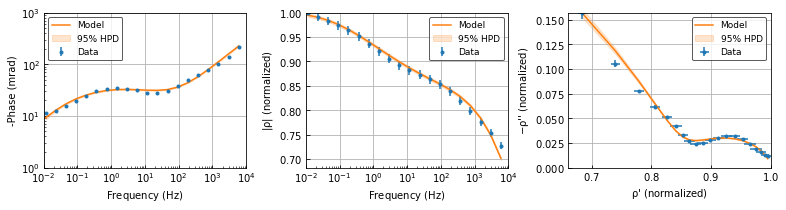

In [14]:
sol.plot_fit(save=True) # See the fit, and this time we want to save it

In [ ]:
# Not too bad.

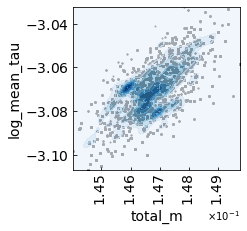

In [19]:
# We can visualize the parameter space in 2D. Neat!
# Add more iterations between burn-in and total to increase the point density in the plot.
sol.plot_KDE('total_m','log_mean_tau') # Also see plot_hexbin

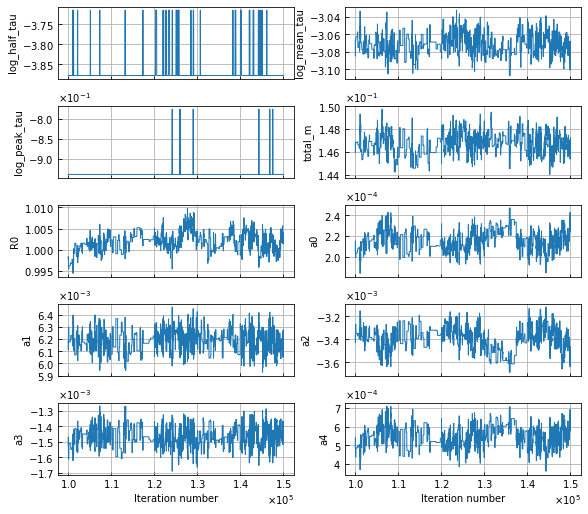

In [12]:
sol.plot_traces() # See if the traces are stationary

In [ ]:
# They look alright. peak tau and half tau are discrete variables so the traces shouldn't move much. 
# Of course we can try to increase the resolution of the RTD. The tradeoff is computation time. Not really worth it.


Saving relaxation time distribution figure in:
 /Users/Charles/Documents/Github/bisip/Examples//Figures/Debye distributions/


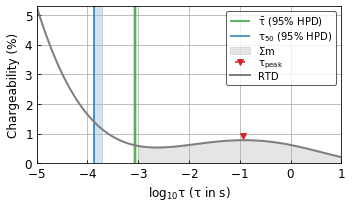

In [16]:
sol.plot_rtd(save=True) # See the relaxation time distribution and save it

In [ ]:
# Note the 95% HPD interval around the featured tau values
# The minimum log_tau value at which the total chargeability is computed is passed to mcmcinv(..., log_min_tau = -3)

In [15]:
sol.print_results() # Print numerical results



Inversion success!
Name of file: /Users/Charles/Documents/SIP dat files/AVG_SIP-Reciprocals_K389160.dat
Model used: PDecomp
R0:      147142.314287 +/- 324.481836807 (0.22%)
a:       [6.188E-03 -3.395E-03 -1.466E-03 5.489E-04 2.159E-04] +/- [8.232E-05 1.006E-04 6.126E-05 5.633E-05 1.001E-05] ['(1.33%)' '(2.96%)' '(4.18%)' '(10.26%)' '(4.64%)']
half_tau: 0.000135352959194 +/- 1.30497750258e-06 (0.96%)
m_:      [1.351E-01 1.175E-01 1.017E-01 8.761E-02 7.502E-02 6.385E-02 5.400E-02
 4.538E-02 3.788E-02 3.141E-02 2.588E-02 2.122E-02 1.732E-02 1.412E-02
 1.154E-02 9.512E-03 7.963E-03 6.832E-03 6.058E-03 5.584E-03 5.358E-03
 5.331E-03 5.457E-03 5.695E-03 6.005E-03 6.354E-03 6.711E-03 7.049E-03
 7.345E-03 7.578E-03 7.732E-03 7.796E-03 7.761E-03 7.621E-03 7.375E-03
 7.027E-03 6.580E-03 6.047E-03 5.439E-03 4.774E-03 4.072E-03 3.359E-03
 2.663E-03 2.014E-03 1.449E-03 1.007E-03 7.301E-04 6.659E-04 8.641E-04
 1.379E-03] +/- [3.180E-03 2.669E-03 2.218E-03 1.823E-03 1.480E-03 1.184E-03 9.311E-04
 7

In [30]:
sol.save_results() # Save a csv file with results (you don't need to call print_results() first)


Saving csv file in:
 /Users/Charles/Documents/Github/bisip/Examples//Results/AVG_SIP-Reciprocals_K389165/
